In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


De quelles informations a-t-on besoin pour prédire le nombre de publicités vues / cliquées ?

In [2]:
df = pd.read_csv("./dataset/instagram_users_lifestyle.csv")

df.head()        # voir les premières lignes
df.info()        # types des colonnes
df.describe()    # stats générales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.018466e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.613253e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.015000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.019000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.026000e+03,5.200000e+01,5.000000e+00,1.867000e+01


De quelles informations a-t-on besoin pour prédire le nombre de publicités vues / cliquées ?

 ads_viewed_per_day             
 ads_clicked_per_day 

Je vais prendre toute les données que j'ai des utilisateurs et faire la correlation entre les 2 valeurs et choisir la meilleure

In [13]:
import pandas as pd

# On garde uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Corrélation Pearson
corr_matrix = df_numeric.corr(method='pearson')

# Corrélation avec pubs vues
corr_views = corr_matrix['ads_viewed_per_day'].sort_values(ascending=False)

# Corrélation avec pubs cliquées
corr_clicks = corr_matrix['ads_clicked_per_day'].sort_values(ascending=False)

print("Top 5 corrélations avec ads_viewed_per_day :")
print(corr_views.drop('ads_viewed_per_day').head(5))

print("\nTop 5 corrélations avec ads_clicked_per_day :")
print(corr_clicks.drop('ads_clicked_per_day').head(5))

Top 5 corrélations avec ads_viewed_per_day :
daily_active_minutes_instagram    0.891905
likes_given_per_day               0.874911
time_on_feed_per_day              0.869404
stories_viewed_per_day            0.852555
comments_written_per_day          0.841030
Name: ads_viewed_per_day, dtype: float64

Top 5 corrélations avec ads_clicked_per_day :
daily_active_minutes_instagram    0.710315
likes_given_per_day               0.696923
time_on_feed_per_day              0.692576
stories_viewed_per_day            0.678726
comments_written_per_day          0.669466
Name: ads_clicked_per_day, dtype: float64


J'ai donc choisi le daily activity qui a la meilleure correlation entre les 2 valeurs
Je vais faire un graphique pour montrer le type de relation entre les 3 valeurs

/tmp/ipykernel_14731/133409093.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_sample.groupby('time_bin').agg({


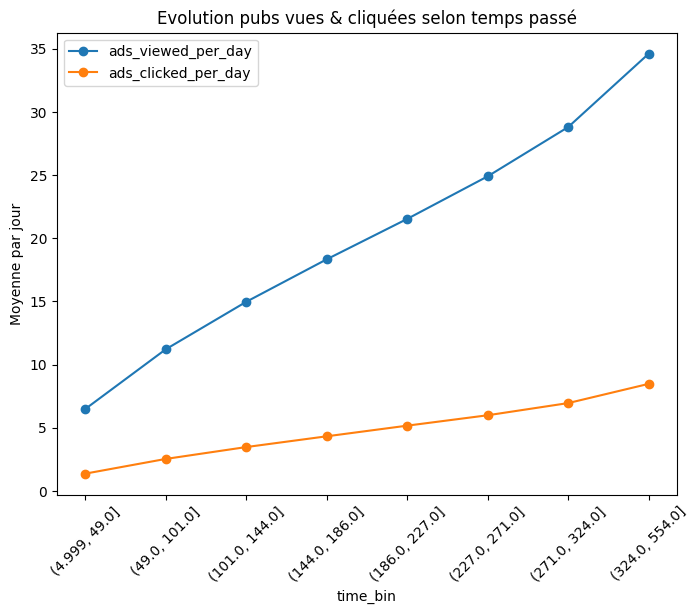

In [7]:
df_sample = df.sample(50000, random_state=42)

df_sample['time_bin'] = pd.qcut(
    df_sample['daily_active_minutes_instagram'],
    8
)

grouped = df_sample.groupby('time_bin').agg({
    'ads_viewed_per_day': 'mean',
    'ads_clicked_per_day': 'mean'
})

grouped.plot(marker='o', figsize=(8,6))
plt.xticks(rotation=45)
plt.title("Evolution pubs vues & cliquées selon temps passé")
plt.ylabel("Moyenne par jour")
plt.show()

Au vue du type de relation linéaire je vais donc choisir un modèle linéaire

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 🔹 On échantillonne pour éviter crash
df_sample = df.sample(2000, random_state=42)

features = [
    'daily_active_minutes_instagram',
    'ads_viewed_per_day'
]

X = df_sample[features]
y = df_sample['ads_clicked_per_day']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("R² :", r2)

print("\nCoefficients :")
for name, coef in zip(features, model.coef_):
    print(name, ":", coef)

MAE : 1.665932914634517
R² : 0.505632197050256

Coefficients :
daily_active_minutes_instagram : 0.01963745626441902
ads_viewed_per_day : 0.001984592916325254


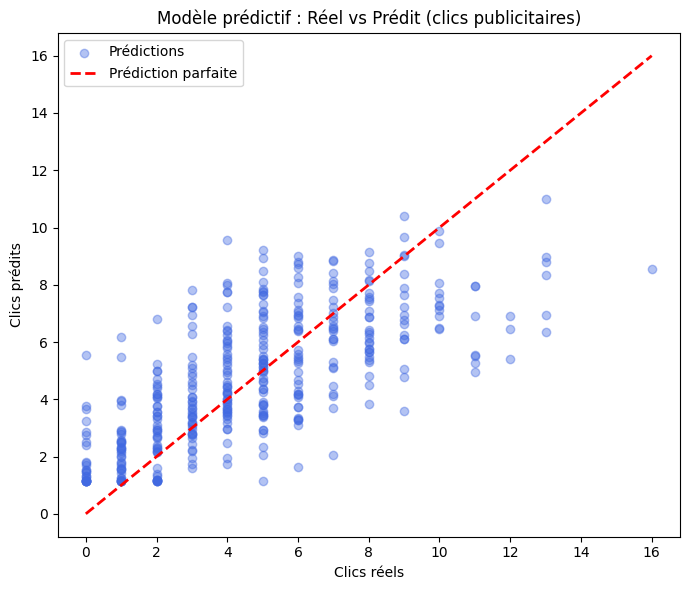

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Limite d'affichage
sample_size = 5000

if len(y_test) > sample_size:
    indices = np.random.choice(len(y_test), sample_size, replace=False)
    y_test_plot = y_test.iloc[indices]
    y_pred_plot = y_pred[indices]
else:
    y_test_plot = y_test
    y_pred_plot = y_pred

plt.figure(figsize=(7,6))

# 🔵 Points prédits
plt.scatter(
    y_test_plot,
    y_pred_plot,
    alpha=0.4,
    color='royalblue',
    label='Prédictions'
)

# 🔴 Ligne idéale
min_val = min(y_test_plot.min(), y_pred_plot.min())
max_val = max(y_test_plot.max(), y_pred_plot.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',
    linestyle='--',
    linewidth=2,
    label='Prédiction parfaite'
)

plt.xlabel("Clics réels")
plt.ylabel("Clics prédits")
plt.title("Modèle prédictif : Réel vs Prédit (clics publicitaires)")
plt.legend()

plt.tight_layout()
plt.show()

On peut donc voir avec ce graphique que plus les personnes passent de temps sur instagram plus ils voient et cliquent sur des publicités